In [1]:
import uproot
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Two muon IDs >0.6
#gamme_E_cms>0.2 GeV
#gamma within CDC acceptance
#ap_theta > 0.175 rad , < 2.9 rad
#chi2>0

#MC15-mumu:
#/pnfs/desy.de/belle/local/belle/MC/release-06-01-08/DB00002649/MC15rd_b/prod00027831/s00/e0026/4S/r01968/mumu/mdst/sub00/mdst_000001_prod00027831_task251967000001.root


In [2]:
signame = ['../Signal_Output/V2/Signal_0.4GeV.root',
           '../Signal_Output/V2/Signal_0.6GeV.root',
           '../Signal_Output/V2/Signal_0.8GeV.root',
           '../Signal_Output/V2/Signal_1GeV.root',
           '../Signal_Output/V2/Signal_2GeV.root',
           '../Signal_Output/V2/Signal_4GeV.root',
           '../Signal_Output/V2/Signal_6GeV.root',
           '../Signal_Output/V2/Signal_8GeV.root',
           '../Signal_Output/V2/Signal_9GeV.root'
          ]

datsig = [uproot.open(x) for x in signame]

filesig = [x['mumu'].arrays(library='np') for x in datsig]

FileNotFoundError: file not found

    '../Signal_Output/V2/Signal_0.4GeV.root'

Files may be specified as:
   * str/bytes: relative or absolute filesystem path or URL, without any colons
         other than Windows drive letter or URL schema.
         Examples: "rel/file.root", "C:\abs\file.root", "http://where/what.root"
   * str/bytes: same with an object-within-ROOT path, separated by a colon.
         Example: "rel/file.root:tdirectory/ttree"
   * pathlib.Path: always interpreted as a filesystem path or URL only (no
         object-within-ROOT path), regardless of whether there are any colons.
         Examples: Path("rel:/file.root"), Path("/abs/path:stuff.root")

Functions that accept many files (uproot.iterate, etc.) also allow:
   * glob syntax in str/bytes and pathlib.Path.
         Examples: Path("rel/*.root"), "/abs/*.root:tdirectory/ttree"
   * dict: keys are filesystem paths, values are objects-within-ROOT paths.
         Example: {"/data_v1/*.root": "ttree_v1", "/data_v2/*.root": "ttree_v2"}
   * already-open TTree objects.
   * iterables of the above.


In [4]:
mcname = ['../MC_Output/Output_MC15_V2_mumu.root']

datmc = [uproot.open(x) for x in mcname]

filemc = [x['mumu'].arrays(library='np') for x in datmc]

In [5]:
labels = ['MC15', '0.4 GeV', '0.6 GeV', '0.8 GeV', '1.0 GeV', '2.0 GeV', '4.0 GeV', '6.0 GeV', '8.0 GeV', '9.0 GeV']

In [6]:
file = filemc + filesig

In [7]:
col = sns.color_palette('magma_r', len(file)+1)

In [8]:
print("Background:", len(file[0]['__experiment__']))
print("0.4 GeV Signal:", len(file[1]['__experiment__']))
print("0.6 GeV Signal:", len(file[2]['__experiment__']))
print("0.8 GeV Signal:", len(file[3]['__experiment__']))
print("1.0 GeV Signal:", len(file[4]['__experiment__']))
print("2.0 GeV Signal:", len(file[5]['__experiment__']))
print("4.0 GeV Signal:", len(file[6]['__experiment__']))
print("6.0 GeV Signal:", len(file[7]['__experiment__']))
print("8.0 GeV Signal:", len(file[8]['__experiment__']))
print("9.0 GeV Signal:", len(file[9]['__experiment__']))

Background: 17524
0.4 GeV Signal: 2442
0.6 GeV Signal: 2247
0.8 GeV Signal: 2021
1.0 GeV Signal: 2046
2.0 GeV Signal: 2120
4.0 GeV Signal: 2503
6.0 GeV Signal: 2532
8.0 GeV Signal: 2594
9.0 GeV Signal: 2522


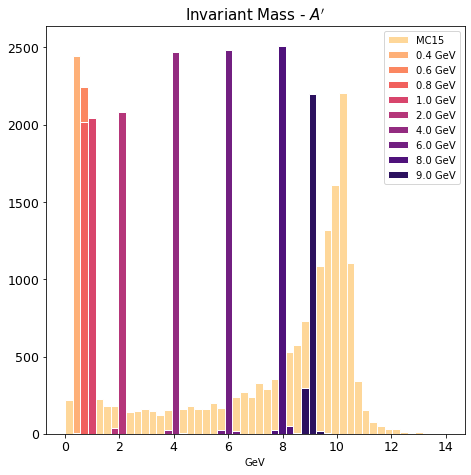

In [16]:
i = 0

fig, ax = plt.subplots(1,1, figsize = (7.5,7.5))
ax.tick_params(axis='both', labelsize=12.5)

for x in file:
    ax.hist(x['ap_InvM'][500:], range = [0,14], bins = 50, label = labels[i], color = col[i], edgecolor = 'white')
    i = i + 1
    
ax.legend()
ax.set_xlabel('GeV')
ax.set_ylabel('')
ax.set_title("Invariant Mass - $A'$", fontsize = 15)
fig.show()

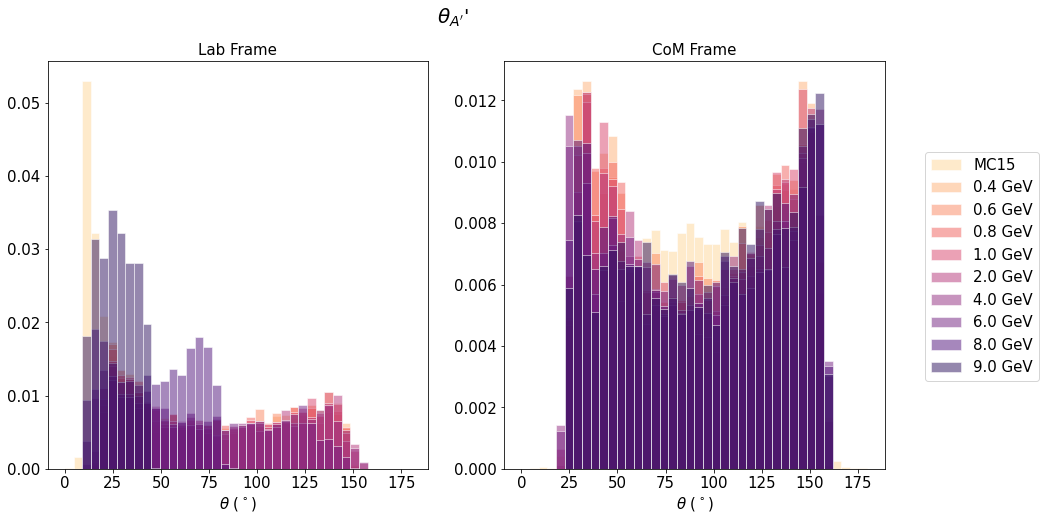

In [47]:
i = 0

fig, ax = plt.subplots(1,2, figsize = (15,7.5))

for x in file:
    ax[0].hist(x['ap_theta']*(180/np.pi), density = True, range = [0,180], bins = 40, alpha  = 0.5, color = col[i], edgecolor='white')
    ax[1].hist(x['ap_cms_theta']*(180/np.pi), density = True, range = [0,180], bins = 40, alpha  = 0.5, label = labels[i], color = col[i], edgecolor='white')
    
    i = i + 1
    
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
ax[0].set_ylabel('', fontsize = 15)
ax[0].set_title('Lab Frame', fontsize = 15)

ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_xlabel(r'$\theta$ ($^\circ$)', fontsize = 15)
ax[1].set_ylabel('', fontsize = 15)
ax[1].set_title('CoM Frame', fontsize = 15)

fig.legend(loc = 'center right', bbox_to_anchor = (1.05,0.5), fontsize = 15)
fig.suptitle(r"$\theta_{A'}$'", fontsize = 20)
fig.show()

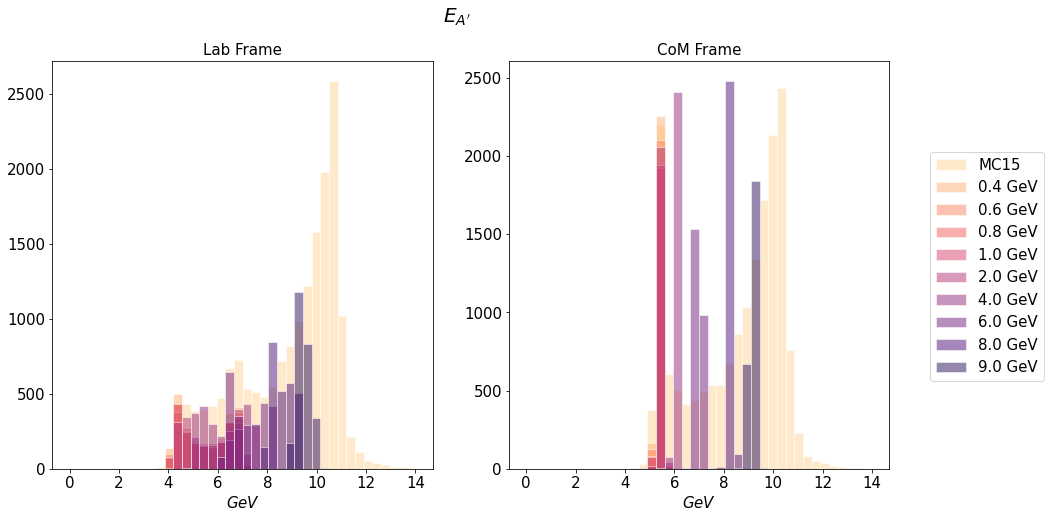

In [48]:
i = 0

fig, ax = plt.subplots(1,2, figsize = (15,7.5))

for x in file:
    ax[0].hist(x['ap_E'], range = [0,14], bins = 40, alpha  = 0.5, color = col[i], edgecolor='white')
    ax[1].hist(x['ap_cms_E'], range = [0,14], bins = 40, alpha  = 0.5, label = labels[i], color = col[i], edgecolor='white')
    
    i = i + 1
    
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_xlabel(r'$GeV$', fontsize = 15)
ax[0].set_ylabel('', fontsize = 15)
ax[0].set_title('Lab Frame', fontsize = 15)

ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_xlabel(r'$GeV$', fontsize = 15)
ax[1].set_ylabel('', fontsize = 15)
ax[1].set_title('CoM Frame', fontsize = 15)

fig.legend(loc = 'center right', bbox_to_anchor = (1.05,0.5), fontsize = 15)
fig.suptitle(r"$E_{A'}$", fontsize = 20)
fig.show()

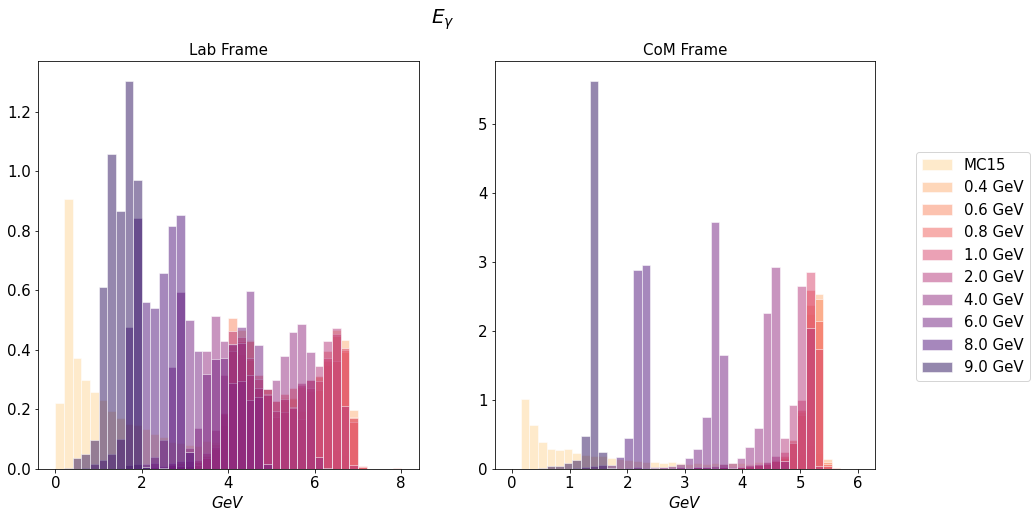

In [50]:
i = 0

fig, ax = plt.subplots(1,2, figsize = (15,7.5))

for x in file:
    ax[0].hist(x['pho_E'], range = [0,8], density = True, bins = 40, alpha  = 0.5, color = col[i], edgecolor='white')
    ax[1].hist(x['pho_cms_E'], range = [0,6], density = True, bins = 40, alpha  = 0.5, label = labels[i], color = col[i], edgecolor='white')
    
    i = i + 1
    
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_xlabel(r'$GeV$', fontsize = 15)
ax[0].set_ylabel('', fontsize = 15)
ax[0].set_title('Lab Frame', fontsize = 15)

ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_xlabel(r'$GeV$', fontsize = 15)
ax[1].set_ylabel('', fontsize = 15)
ax[1].set_title('CoM Frame', fontsize = 15)

fig.legend(loc = 'center right', bbox_to_anchor = (1.05,0.5), fontsize = 15)
fig.suptitle(r'$E_{\gamma}$', fontsize = 20)
fig.show()

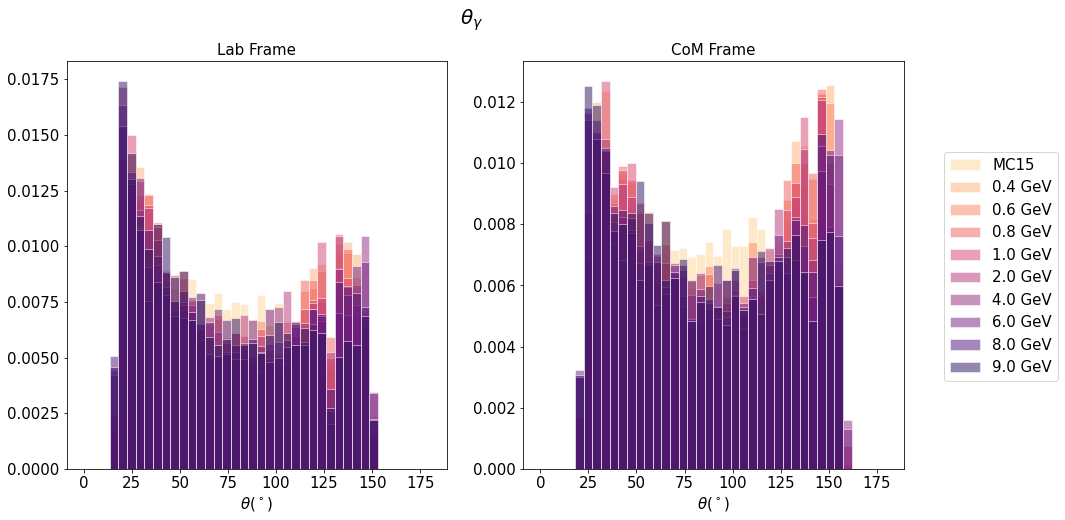

In [51]:
i = 0

fig, ax = plt.subplots(1,2, figsize = (15,7.5))

for x in file:
    ax[0].hist(x['pho_theta']*(180/np.pi), density = True, range = [0,180], bins = 40, alpha  = 0.5, color = col[i], edgecolor='white')
    ax[1].hist(x['pho_cms_theta']*(180/np.pi), density = True, range = [0,180], bins = 40, alpha  = 0.5, label = labels[i], color = col[i], edgecolor='white')
    
    i = i + 1
    
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_xlabel(r'$\theta(^\circ)$', fontsize = 15)
ax[0].set_ylabel('', fontsize = 15)
ax[0].set_title('Lab Frame', fontsize = 15)

ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_xlabel(r'$\theta(^\circ)$', fontsize = 15)
ax[1].set_ylabel('', fontsize = 15)
ax[1].set_title('CoM Frame', fontsize = 15)

fig.legend(loc = 'center right', bbox_to_anchor = (1.05,0.5), fontsize = 15)
fig.suptitle(r'$\theta_{\gamma}$', fontsize = 20)
fig.show()

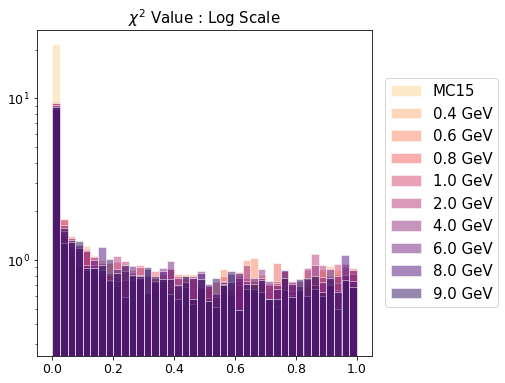

In [59]:
i = 0

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.tick_params(axis='both', labelsize=12.5)

for x in file:
    ax.hist(x['vpho_chiProb'], density = True, bins = 40, alpha = 0.5, label = labels[i], color = col[i], edgecolor = 'white')
    i = i + 1
  
ax.set_yscale('log')
ax.legend(loc = 'center right', bbox_to_anchor = (1.4,0.5), fontsize = 15)

ax.set_title("$\chi^2$ Value : Log Scale", fontsize = 15)
fig.show()

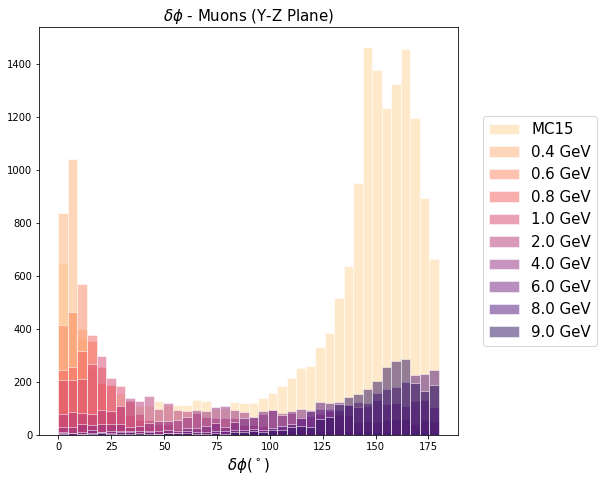

In [57]:
fig, ax = plt.subplots(1,1, figsize = (7.5,7.5))

i = 0
for x in file:
    magap = np.sqrt(x['d1_py']**2 + x['d1_pz']**2)
    magmu = np.sqrt(x['d2_py']**2 + x['d2_pz']**2)
    prod  = x['d1_py']*x['d2_py'] + x['d1_pz']*x['d2_pz']
    ax.hist(np.arccos(prod/(magap*magmu))*(180/np.pi), range = [0,180], bins = 40, alpha = 0.5, label = labels[i], color = col[i], edgecolor = 'white')
    i = i + 1

ax.legend(loc = 'center right', bbox_to_anchor = (1.35,0.5), fontsize = 15)
ax.set_xlabel(r'$\delta \phi(^\circ)$', fontsize = 15)
ax.set_ylabel('', fontsize = 15)
ax.set_title('$\delta \phi$ - Muons (Y-Z Plane)', fontsize = 15)
fig.show()